<a href="https://colab.research.google.com/github/puttu001/Random-number-Generation/blob/main/RNG_test_Puttu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tests for RNG

In [3]:
import math as Mm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import time

# Test for uniformity
from scipy.stats import kstest
from scipy.stats import chi2

# Runs test
import random
import statistics as stats
from scipy.stats import norm

# Permutation test
from mlxtend.evaluate import permutation_test


Use this basic function and get familiarised with it.

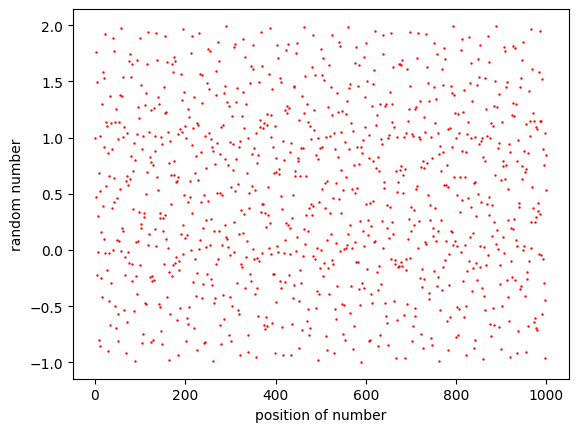

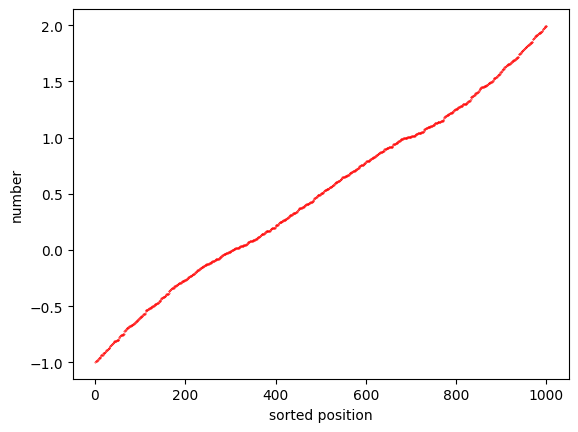

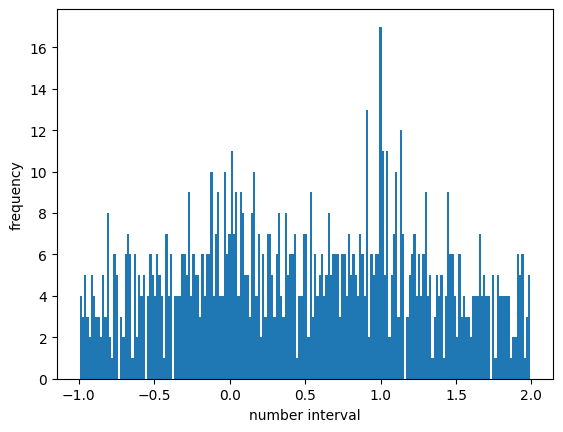

         n        y
n  1.00000 -0.00295
y -0.00295  1.00000


In [4]:
# APS00 is a basic function that returns a number sequence
# where n is the number of numbers and k is the sampling rate
def APS00(n,k):
  # Array from zero to k*n
  n = k*np.arange(n)
  # coefficients root of 3 and 7, randomly chosen
  a = Mm.sqrt(3)
  b = Mm.sqrt(7)

  # finding the number sequence, division by 5 is for normalisation
  y = np.sin(a*n) + np.cos(b*n)**2
  return y

def plot_print(n,y):
  n = np.arange(1,n+1)
  # plotting the sequence
  plt.scatter(n,y,s=0.5,c='red')
  plt.xlabel('position of number')
  plt.ylabel('random number')
  plt.show()
  # sorted plot of the sequence
  ys = np.sort(y)
  plt.scatter(n,ys,s=0.1,c='red')
  plt.xlabel('sorted position')
  plt.ylabel('number')
  plt.show()
  # histogram of the data
  plt.hist(y,bins=200)
  plt.xlabel('number interval')
  plt.ylabel('frequency')
  plt.show()
  # printing correlation of the data
  N = pd.DataFrame(data = np.array([n,y]).T, columns = ['n','y'])
  N.head()
  print(N.corr())

n = 1000
y = APS00(n,13)

plot_print(n,y)

In [5]:
# explore the function with various sampling rate and different powers
# give attention to the histogram and try to make it uniform
# u can change the coefficients of cosines and even the irrationals
# we can observe the more tendency of zero from the first and second plots
# which will be evident in the following section

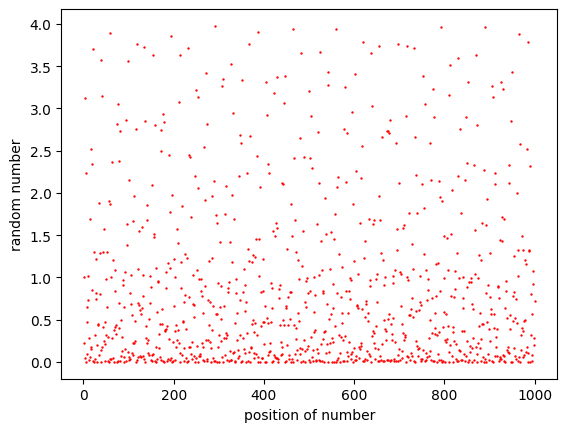

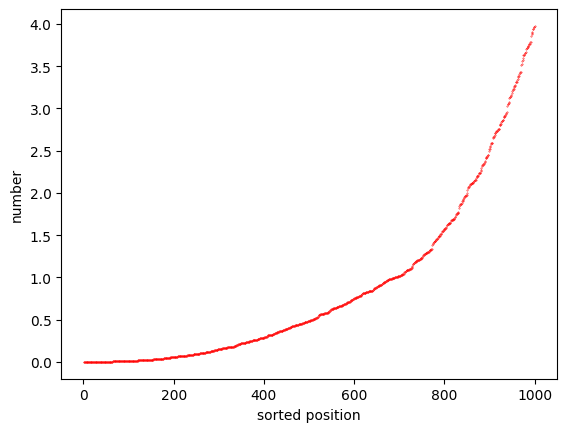

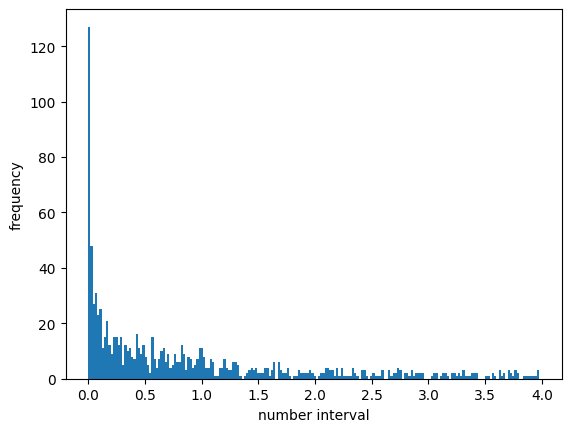

         n        y
n  1.00000 -0.00263
y -0.00263  1.00000


In [6]:
y2 = y**2
plot_print(n,y2)

In [7]:
# this squared function is having a kind of uniformity sfter 2 - 2.5

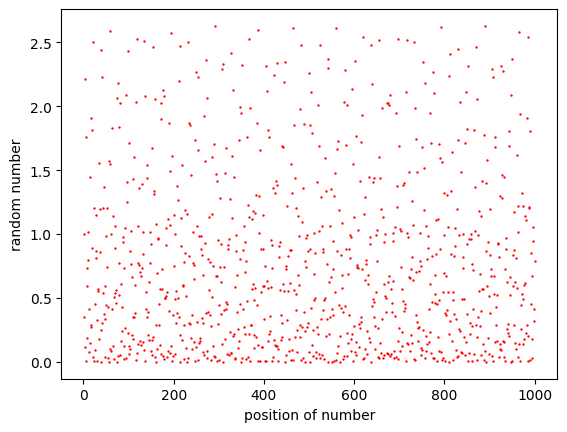

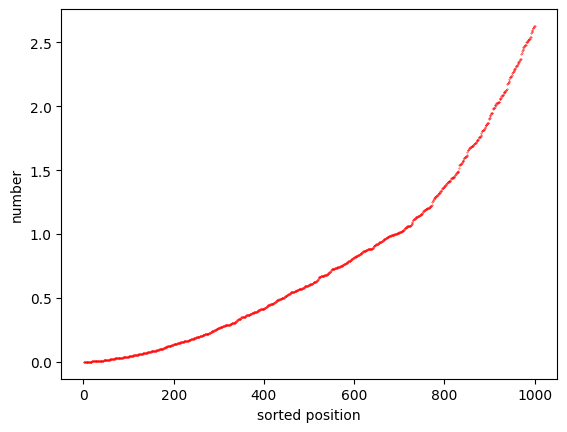

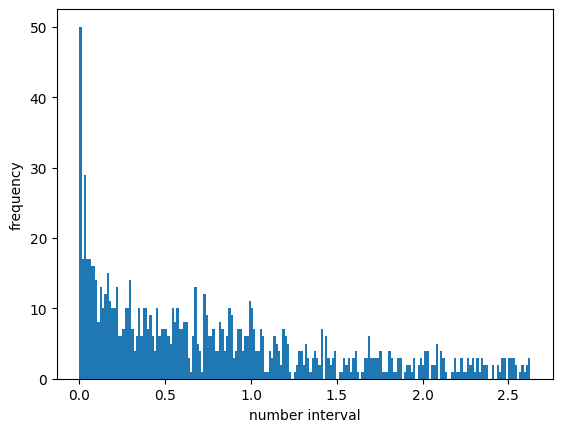

          n         y
n  1.000000 -0.001699
y -0.001699  1.000000


In [8]:
y1_4 = y2**0.7
plot_print(n,y1_4)

Null Hypothesis (H0): The sample data follows a uniform distribution.

Alternative Hypothesis (H1): The sample data does not follow a uniform distribution.

If p-value is small (typically < 0.05): The null hypothesis (data follows a uniform distribution) is rejected. If p-value is large : Fail to reject the null hypothesis. The data does not provide enough evidence to conclude it does not follow a uniform distribution.

statistic: This is the test statistic, which measures the maximum vertical distance between the empirical cumulative distribution function (ECDF) of your data and the cumulative distribution function (CDF) of the reference distribution (in this case, the uniform distribution). In simpler terms, it indicates how much the two distributions differ.

statistic_location: This is the location parameter of the estimated distribution under the null hypothesis. It represents the point at which the two cumulative distribution functions are most different.

statistic_sign: This indicates the direction of the difference between the two distributions. For -1 suggests that the ECDF of your data is below the CDF of the reference distribution and vice versa.

Frequency Test

In [9]:
# Frequency Test
def ks_test_uniform(data, alpha=0.05):
    """
    Perform Kolmogorov-Smirnov (KS) test against a uniform distribution.

    Parameters:
    - data: numpy array or list, the sequence of random numbers to test
    - alpha: float, significance level for the test

    Returns:
    - ks_statistic: float, KS test statistic
    - ks_p_value: float, p-value of the KS test
    - interpretation: str, interpretation of the test results
    """
    # Perform Kolmogorov-Smirnov test
    ks_statistic, ks_p_value = kstest(data, 'uniform')

    # Interpret the results
    if ks_p_value < alpha:
        interpretation = "The null hypothesis (data follows a uniform distribution) is rejected."
    else:
        interpretation = "Fail to reject the null hypothesis. The data does not provide enough evidence to conclude it does not follow a uniform distribution."

    return ks_statistic, ks_p_value, interpretation

# Example usage:
# Set seed to make the example reproducible
np.random.seed(0)

# Generate a dataset
data1 = np.random.uniform(0, 1, 1000)

# Perform KS test and print results
print('RNG of numpy')
ks_statistic, ks_p_value, interpretation = ks_test_uniform(data1)
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
print(interpretation)
print('Our RNG')
ks_statistic, ks_p_value, interpretation = ks_test_uniform(y)
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
print(interpretation)

RNG of numpy
KS Statistic: 0.0281441162439926
P-value: 0.3993594969068006
Fail to reject the null hypothesis. The data does not provide enough evidence to conclude it does not follow a uniform distribution.
Our RNG
KS Statistic: 0.31133262825159636
P-value: 1.3282521866403946e-86
The null hypothesis (data follows a uniform distribution) is rejected.


Chi-Square Test



In [10]:
# Chi_square Test
def chi_square_test(data, num_bins=10, alpha=0.05):
    """
    Perform Chi-Square test for randomness.

    Parameters:
    - data: numpy array or list, the sequence of random numbers to test
    - num_bins: int, number of bins for the Chi-Square test
    - alpha: float, significance level for the test

    Returns:
    - result: dict, containing the Chi-Square test results
    """

    # Step 1: Calculate observed and expected frequencies
    observed, _ = np.histogram(data, bins=num_bins)
    expected = np.ones(num_bins) * len(data) / num_bins

    # Step 2: Calculate Chi-Square statistic
    chi_squared_stat = np.sum((observed - expected)**2 / expected)

    # Step 3: Determine degrees of freedom
    degrees_of_freedom = num_bins - 1

    # Step 4: Calculate p-value
    p_value = 1 - chi2.cdf(chi_squared_stat, degrees_of_freedom)

    # Step 5: Compare p-value to significance level
    result = {
        'chi_squared_stat': chi_squared_stat,
        'degrees_of_freedom': degrees_of_freedom,
        'p_value': p_value,
        'alpha': alpha,
        'result': 'Reject' if p_value < alpha else 'Fail to Reject'
    }

    return result

# Example usage:
# Replace this with your actual RNG output
rng_output = np.random.uniform(0,1,1000)

# Perform Chi-Square test
result = chi_square_test(rng_output)

# Print results with comments
print("Chi-Square Statistic:", result['chi_squared_stat'])
print("Degrees of Freedom:", result['degrees_of_freedom'])
print("P-value:", result['p_value'])
print("Alpha:", result['alpha'])
print("Result:", result['result'])


Chi-Square Statistic: 14.44
Degrees of Freedom: 9
P-value: 0.1075118761488223
Alpha: 0.05
Result: Fail to Reject


Permutation Test

In [11]:
import numpy as np
from mlxtend.evaluate import permutation_test

def perform_permutation_test(x, y, alpha=0.05, seed=0):
    # Print the observed correlation coefficient
    observed_corr = np.corrcoef(x, y)[1][0]
    print('Observed R: %.2f' % observed_corr)

    # Perform a permutation test using the mlxtend library
    p_value = permutation_test(x, y, method='exact', func=lambda x, y: np.corrcoef(x, y)[1][0], seed=seed)

    # Print the p-value
    print("P-value: %.4f" % p_value)

    # Interpretation based on the comparison with the significance level (alpha)
    if p_value < alpha:
        interpretation = "The null hypothesis (no correlation between the samples) is rejected."
    else:
        interpretation = "Fail to reject the null hypothesis. There is not enough evidence to conclude a significant correlation."

    # Return the result as a dictionary
    result = {
        'interpretation': interpretation
    }

    return result

# Sample data
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 1, 5, 6, 71])

# Perform the permutation test
result = perform_permutation_test(x, y, alpha=0.05, seed=0)

# Display the result
print(result)

Observed R: 0.69
P-value: 0.1039
{'interpretation': 'Fail to reject the null hypothesis. There is not enough evidence to conclude a significant correlation.'}


Autocorrelation Test


In [12]:
def autocorrelation_test(random_numbers):
    """
    Perform an autocorrelation test on a sequence of random numbers.

    Parameters:
    - random_numbers: Sequence of random numbers.


    Returns:
    - is_random: True if the sequence appears to be random, False otherwise.
    """

    # Calculate autocorrelation function (ACF) using NumPy
    acf_values = np.correlate(random_numbers, random_numbers, mode='full')

    # Normalize the ACF values
    acf_values /= np.max(acf_values)

    # Perform the autocorrelation test
    critical_value = 1.96 / np.sqrt(len(random_numbers))
    print(critical_value)
    is_random = all(np.abs(acf_values) < critical_value)

    # Print the result
    if is_random:
        print("The sequence appears to be random.")
    else:
        print("The sequence may have autocorrelation or a pattern.")

    return is_random

# Example usage:
rng_sequence = np.random.uniform(0,1,10000)
autocorrelation_test(rng_sequence)


0.0196
The sequence may have autocorrelation or a pattern.


False

gap test

In [13]:
import numpy as np

def gap_test(sequence, digit):
    gaps = []
    for i in range(len(sequence) - 1):
        if sequence[i] == digit and sequence[i + 1] != digit:
            gaps.append(i + 1 - i)

    gap_sizes = np.unique(gaps)
    observed_counts = np.array([gaps.count(gap_size) for gap_size in gap_sizes])

    expected_counts = np.zeros_like(observed_counts)
    for gap_size in gap_sizes:
        expected_counts[gap_size - 1] = (len(sequence) - gap_size) * (1 / len(sequence))

    # Perform Kolmogorov-Smirnov test
    from scipy.stats import kstest
    ks_statistic, p_value = kstest(observed_counts, expected_counts)

    # Evaluate significance
    if p_value < 0.05:
        print("Reject the null hypothesis of uniform randomness. There is evidence of non-uniformity in the spacing between occurrences of the digit.")
    else:
        print("Accept the null hypothesis of uniform randomness. There is no evidence of non-uniformity in the spacing between occurrences of the digit.")

# Example usage
sequence = "0101101011010"
digit = "0"

gap_test(sequence, digit)

Accept the null hypothesis of uniform randomness. There is no evidence of non-uniformity in the spacing between occurrences of the digit.


Should use linux to run the following code and make sure you install latest version of dieharder. Instead of using this Cpp code you can also directly use the command in linux terminal to run the test.

In [14]:
#include <cstdlib>   #include<iostream>
# using namespace std;

# int main() {

#     const char* command = "dieharder -a -f random_numbers > dieharder_results.txt";
#     int result = system(command);
#     if (result == 0) {
#         std::cout << "dieharder executed successfully." << std::endl;
#     } else {
#         std::cerr << "dieharder execution failed." << std::endl;
#     }
#     return 0;
# }


### Runs Test

In testing for independence, the hypotheses are as follows;

H<sub>o</sub>
: R<sub>i</sub>
~ independently

H<sub>a</sub>
: R<sub>i</sub> ≠ independently

This null hypothesis, Ho
, reads that the numbers are independent. Failure to reject the null hypothesis
means that no evidence of dependence has been detected on the basis of this test. This does not imply
that further testing of the generator for independence is unnecessary.


Two types of errors are possible when performing a hypothesis test
1. Type I error: H<sub>o</sub>
is rejected even though true
2. Type II error: H<sub>o</sub>
is accepted even though false


In [15]:
def runsTest(l, l_median, alpha=0.05):
    """
    Performs a runs test for randomness on a sequence.

    Parameters:
    - l: list, the sequence to be tested for randomness
    - l_median: float, the median of the sequence
    - alpha: float, significance level for the test

    Returns:
    - z: float, Z-statistic for the runs test
    - interpretation: str, interpretation of the test results
    """

    runs, n1, n2 = 0, 0, 0

    # Checking for the start of a new run
    for i in range(1, len(l)):
        # Counting the number of runs
        if (l[i] >= l_median and l[i - 1] < l_median) or \
                (l[i] < l_median and l[i - 1] >= l_median):
            runs += 1

        # Counting the number of positive values
        if l[i] >= l_median:
            n1 += 1

        # Counting the number of negative values
        else:
            n2 += 1

    # Calculating expected runs and standard deviation
    runs_exp = ((2 * n1 * n2) / (n1 + n2)) + 1
    stan_dev = Mm.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) /
                         (((n1 + n2) ** 2) * (n1 + n2 - 1)))

    # Calculating Z-statistic
    z = (runs - runs_exp) / stan_dev

    # Calculating critical values for Z-statistic
    z_critical = norm.ppf(1 - alpha / 2)  # Two-tailed test

    # Interpret the results
    if (z >= z_critical) or (z <= -z_critical):
        interpretation = "The null hypothesis (data is random) is rejected."
    else:
        interpretation = "Fail to reject the null hypothesis. The data is consistent with randomness."

    return z, interpretation

# Making a list of 100 random numbers
l = [random.random() for _ in range(100)]

# Calculating the median of the sequence
l_median = stats.median(l)

# Running the runs test and obtaining results
Z, interpretation = runsTest(l, l_median)

# Displaying the results
print('Z-statistic= ', Z)
print(interpretation)


Z-statistic=  -0.5041341274860756
Fail to reject the null hypothesis. The data is consistent with randomness.


Finding list of pairs of (n,k) for which the APS00 function defined above will pass the runs test

In [16]:
def find_valid_combinations(iterations=100, alpha=0.05):
    valid_combinations = []

    for _ in range(iterations):
        # Generate random values for n and k
        n = np.random.randint(10, 100)
        k = np.random.randint(1, 10)

        # Call APS00 function
        sequence = APS00(n, k)

        # Calculate the median of the sequence
        sequence_median = stats.median(sequence)

        # Run the runsTest and obtain results
        Z, interpretation = runsTest(sequence, sequence_median, alpha)

        # Check if the interpretation is consistent with randomness
        if "consistent with randomness" in interpretation:
            valid_combinations.append((n, k))

    return valid_combinations

# Example usage
valid_combinations = find_valid_combinations(iterations=200, alpha=0.05)
print("Valid combinations:", valid_combinations)

Valid combinations: [(23, 4), (18, 5), (46, 1), (13, 6), (34, 5), (33, 3), (12, 5), (51, 8), (60, 8), (14, 8), (57, 8), (11, 8), (88, 1), (14, 5), (16, 1), (16, 8), (62, 1), (66, 1), (55, 8), (63, 8), (18, 1), (83, 1), (24, 8), (23, 6), (29, 1), (21, 8), (59, 8), (53, 8), (64, 1), (33, 1), (73, 8), (16, 1), (20, 5), (11, 6), (44, 1), (56, 8), (98, 1), (74, 1), (82, 1), (19, 1), (84, 1), (72, 8), (18, 8), (20, 6), (42, 1), (15, 6), (81, 1), (21, 8), (23, 5), (57, 1), (73, 1), (80, 1), (23, 1), (77, 1), (59, 1), (52, 8), (71, 8), (14, 3), (10, 4)]
